In [69]:
import numpy as np
from PIL import Image
import seaborn as sn
from skimage.transform import resize
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [70]:
label_mapping = {0: 0,
                 1: 0,
                 3: 1,
                 4: 2,
                 5: 3,
                 6: 4,
                 7: 5,
                 8: 6,
                 9: 7,
                 10: 8,
                 12: 9,
                 15: 10,
                 17: 11,
                 18: 12,
                 19: 13,
                 23: 14,
                 27: 15,
                 29: 1,
                 30: 1,
                 31: 16,
                 32: 4,
                 33: 17,
                 34: 18}

In [71]:
label_mapping = {0: 0,
                 1: 0,
                 3: 1,
                 4: 2,
                 5: 3,
                 6: 4,
                 7: 5,
                 8: 6,
                 9: 7,
                 10: 8,
                 12: 9,
                 15: 10,
                 17: 11,
                 18: 12,
                 19: 13,
                 23: 14,
                 27: 15,
                 31: 16,
                 33: 17,
                 34: 18}

In [72]:
classname_list = ["void", "grass", "tree", "pole", "water", "sky", "vehicle", "object", "asphalt",
                  "building", "log", "person", "fence", "bush", "concrete", "barrier", "puddle", "mud", "rubble"]

In [73]:
new_order = [7,3,4,19,23,33,17,31,34,27,15,18,8,9,5,6,10,12,1,0]

In [74]:
label_mapping2 =   {0: 18, #"void"
  1: 18, #"dirt"
  3: 1, #"grass"
  4: 2 ,#"tree"
  5: 14, #"pole"
  6: 15, #"water"
  7: 0, #"sky"
  8: 12, #"vehicle"
  9: 13, #"object"
  10: 16, #"asphalt"
  12: 17, #"building"
  15: 10, #"log"
  17: 6, #"person"
  18: 11, #"fence"
  19: 3, #"bush"
  23: 4, #"concrete"
  27: 9, #"barrier"
  31: 7, #"puddle"
  33: 5, #"mud"
  34: 8} #"rubble"}

In [75]:
classname_list = ["sky", "grass", "tree", "bush", "concrete", "mud","person", "puddle", "rubble", "barrier",
                  "log", "fence", "vehicle", "object", "pole", "water", "asphalt", "building",  "void"]

In [76]:
def get_confusion_matrix(label, pred, size, num_class, ignore=-1):
    """
    Calcute the confusion matrix by given label and pred
    """
    seg_pred = pred.flatten().astype('int32')
    seg_gt = label.flatten().astype('int32')
    ignore_index = seg_gt != ignore
    seg_gt = seg_gt[ignore_index]
    seg_pred = seg_pred[ignore_index]
    index = (seg_gt * num_class + seg_pred).astype('int32')
    label_count = np.bincount(index)
    confusion_matrix = np.zeros((num_class, num_class))
    for i_label in range(num_class):
        for i_pred in range(num_class):
            cur_index = i_label * num_class + i_pred
            if cur_index < len(label_count):
                confusion_matrix[i_label,
                                 i_pred] = label_count[cur_index]
    
    return confusion_matrix

In [77]:
def convert_label(label, label_mapping, inverse=False):
    temp = label.copy()
    if inverse:
        for v, k in label_mapping.items():
            label[temp == k] = v
    else:
        for k, v in label_mapping.items():
            label[temp == k] = v
    return label

In [78]:
font = {'family' : 'normal',
        'weight': 'bold',
        'size'   : 44}

matplotlib.rc('font', **font)
def plot_confusion_matrix(cm, classname_list):
    cm_sum = cm.sum(axis=1)
    cm_sum[cm_sum == 0] = 0.1

    cmn = cm/cm_sum[:, np.newaxis]
    #cmn = cm
    df_cm = pd.DataFrame(cmn, index=classname_list,
                         columns=classname_list)
    fig = plt.figure(figsize=(20, 14))
    sn.heatmap(df_cm, cmap="Blues")# annot=True,#fmt='.2f',cmap="YlGnBu")
    plt.xticks(rotation=90)
    plt.yticks(rotation=360)
    plt.ylabel('Actual',fontweight='bold')
    plt.xlabel('Predicted',fontweight='bold')
    plt.show()

In [79]:
root = "/home/usl/Datasets/"
list_path = "test.lst"
num_class = 19
img_list = [line.strip().split()[1] for line in open(root+"/rellis/"+list_path)]
confusion_matrix = np.zeros((num_class,num_class)).astype(np.float64)
for index, img_path in enumerate(img_list[:]):
    label_path = os.path.join(root,"rellis",img_path)
    pred_path = os.path.join(root,"hrnet",img_path)
    label = Image.open(label_path)
    label = np.array(label)
    label = convert_label(label, label_mapping2)
    label_shape = label.shape
    pred = Image.open(pred_path)
    if label_shape[0] != pred.size[0] or label_shape[1] != pred.size[1]:
        pred = pred.resize((label_shape[1],label_shape[0]),Image.NEAREST)
    pred = np.array(pred)[:,:,0]
    pred = convert_label(pred, label_mapping,True)
    pred = convert_label(pred, label_mapping2)
    confusion_matrix =confusion_matrix + get_confusion_matrix(label,pred,label.shape,num_class,18)
    if index % 100 == 0:
        print('processing: %d images' % index)
        pos = confusion_matrix.sum(1)
        res = confusion_matrix.sum(0)
        tp = np.diag(confusion_matrix)
        IoU_array = (tp / np.maximum(1.0, pos + res - tp))
        mean_IoU = IoU_array.mean()
        print('mIoU: %.4f' % (mean_IoU))    

processing: 0 images
mIoU: 0.3054
processing: 100 images
mIoU: 0.3395
processing: 200 images
mIoU: 0.3582
processing: 300 images
mIoU: 0.3595
processing: 400 images
mIoU: 0.3597
processing: 500 images
mIoU: 0.3566
processing: 600 images
mIoU: 0.3746
processing: 700 images
mIoU: 0.4432
processing: 800 images
mIoU: 0.4425
processing: 900 images
mIoU: 0.4443
processing: 1000 images
mIoU: 0.4533
processing: 1100 images
mIoU: 0.4599
processing: 1200 images
mIoU: 0.4865
processing: 1300 images
mIoU: 0.4953
processing: 1400 images
mIoU: 0.4931
processing: 1500 images
mIoU: 0.4905
processing: 1600 images
mIoU: 0.4877


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


[0.96938115 0.90200604 0.80525071 0.76757941 0.84215983 0.43287632
 0.89477057 0.73935476 0.62028268 0.54863872 0.         0.39517992
 0.41541659 0.46437056 0.09508234 0.00718181 0.33248209 0.04597741
 0.        ] 0.4883153109165228
 96.94 & 90.20 & 80.53 & 76.76 & 84.22 & 43.29 & 89.48 & 73.94 & 62.03 & 54.86 & 0.00 & 39.52 & 41.54 & 46.44 & 9.51 & 0.72 & 33.25 & 4.60 & 0.00 &

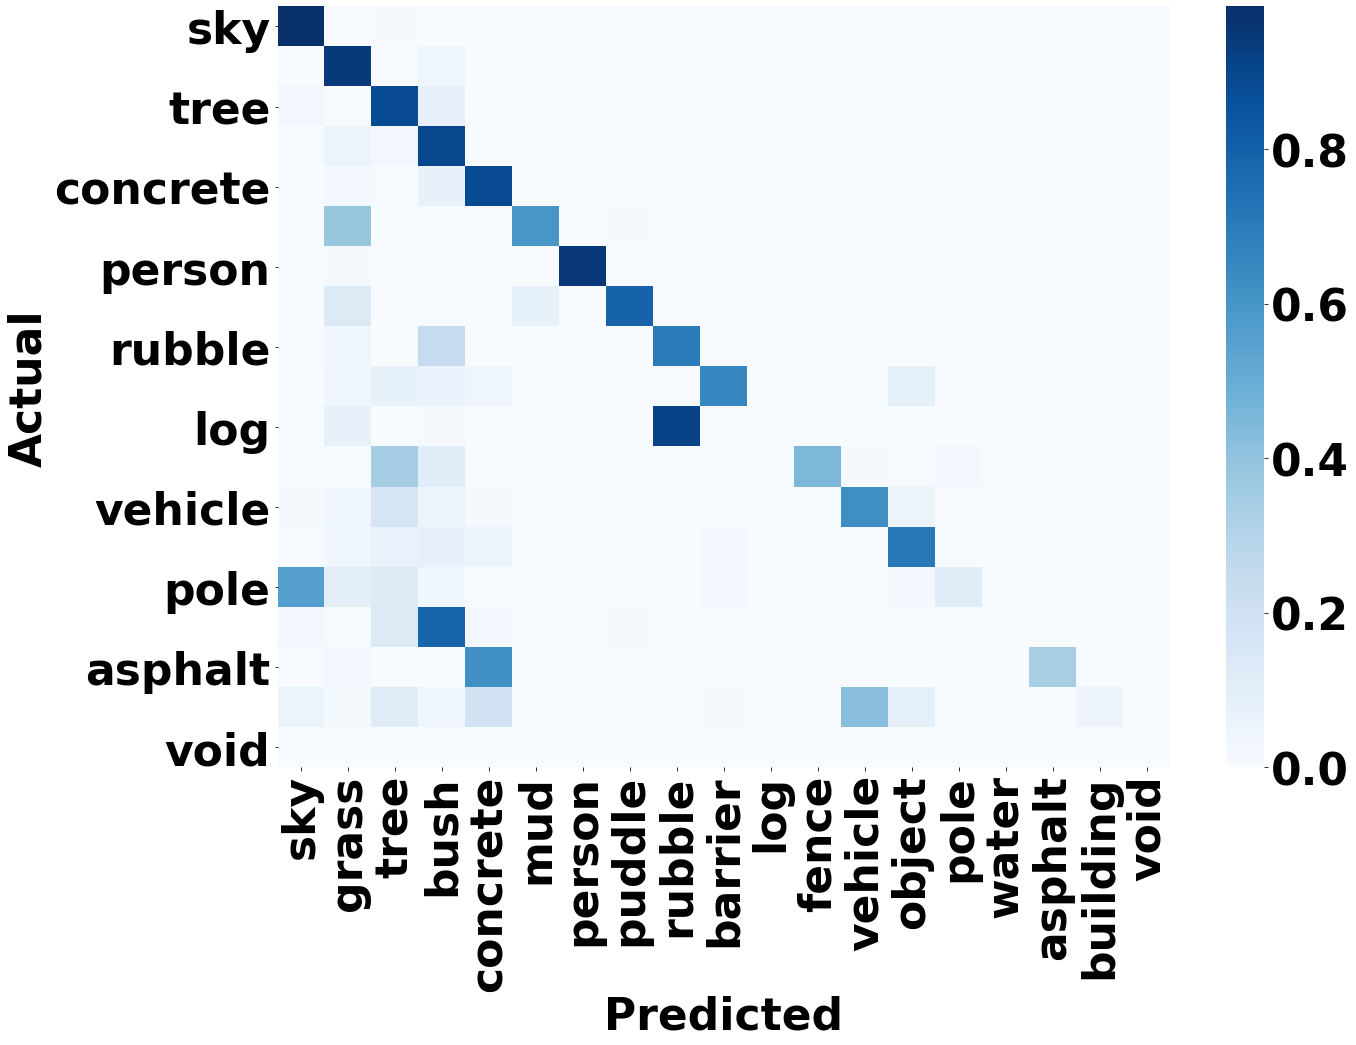

In [80]:
pos = confusion_matrix.sum(1)
res = confusion_matrix.sum(0)
tp = np.diag(confusion_matrix)
IoU_array = (tp / np.maximum(1.0, pos + res - tp))
mean_IoU = IoU_array.mean()    
print(IoU_array,mean_IoU)
for iou in IoU_array:
    iou = iou*100
    print(f" {iou:4.2f} &",end = '')
plot_confusion_matrix(confusion_matrix,classname_list)

In [81]:
root = "/home/usl/Datasets/"
list_path = "test.lst"
num_class = 19
img_list = [line.strip().split()[1] for line in open(root+"/rellis/"+list_path)]
confusion_matrix = np.zeros((num_class,num_class)).astype(np.float64)
for index, img_path in enumerate(img_list[:]):
    label_path = os.path.join(root,"rellis",img_path)
    pred_path = os.path.join(root,"gscnn",img_path)
    label = Image.open(label_path)
    label = np.array(label)
    label = convert_label(label, label_mapping2)
    label_shape = label.shape
    pred = Image.open(pred_path)
    if label_shape[0] != pred.size[0] or label_shape[1] != pred.size[1]:
        pred = pred.resize((label_shape[1],label_shape[0]),Image.NEAREST)
    pred = np.array(pred)[:,:,0]
    pred = convert_label(pred, label_mapping,True)
    pred = convert_label(pred, label_mapping2)
    confusion_matrix =confusion_matrix + get_confusion_matrix(label,pred,label.shape,num_class,18)
    if index % 100 == 0:
        print('processing: %d images' % index)
        pos = confusion_matrix.sum(1)
        res = confusion_matrix.sum(0)
        tp = np.diag(confusion_matrix)
        IoU_array = (tp / np.maximum(1.0, pos + res - tp))
        mean_IoU = IoU_array.mean()
        print('mIoU: %.4f' % (mean_IoU))    

processing: 0 images
mIoU: 0.3487
processing: 100 images
mIoU: 0.3572
processing: 200 images
mIoU: 0.3729
processing: 300 images
mIoU: 0.3692
processing: 400 images
mIoU: 0.3684
processing: 500 images
mIoU: 0.3659
processing: 600 images
mIoU: 0.3893
processing: 700 images
mIoU: 0.4528
processing: 800 images
mIoU: 0.4405
processing: 900 images
mIoU: 0.4402
processing: 1000 images
mIoU: 0.4555
processing: 1100 images
mIoU: 0.4681
processing: 1200 images
mIoU: 0.5026
processing: 1300 images
mIoU: 0.5081
processing: 1400 images
mIoU: 0.5050
processing: 1500 images
mIoU: 0.5016
processing: 1600 images
mIoU: 0.4996


[0.97015389 0.84950016 0.78518555 0.70334837 0.83819885 0.45524855
 0.90314871 0.7148825  0.66033976 0.5512475  0.02919252 0.41860319
 0.46512348 0.54643349 0.0689726  0.0094221  0.44182191 0.11466227
 0.        ] 0.5013413361966305
 97.02 & 84.95 & 78.52 & 70.33 & 83.82 & 45.52 & 90.31 & 71.49 & 66.03 & 55.12 & 2.92 & 41.86 & 46.51 & 54.64 & 6.90 & 0.94 & 44.18 & 11.47 & 0.00 &

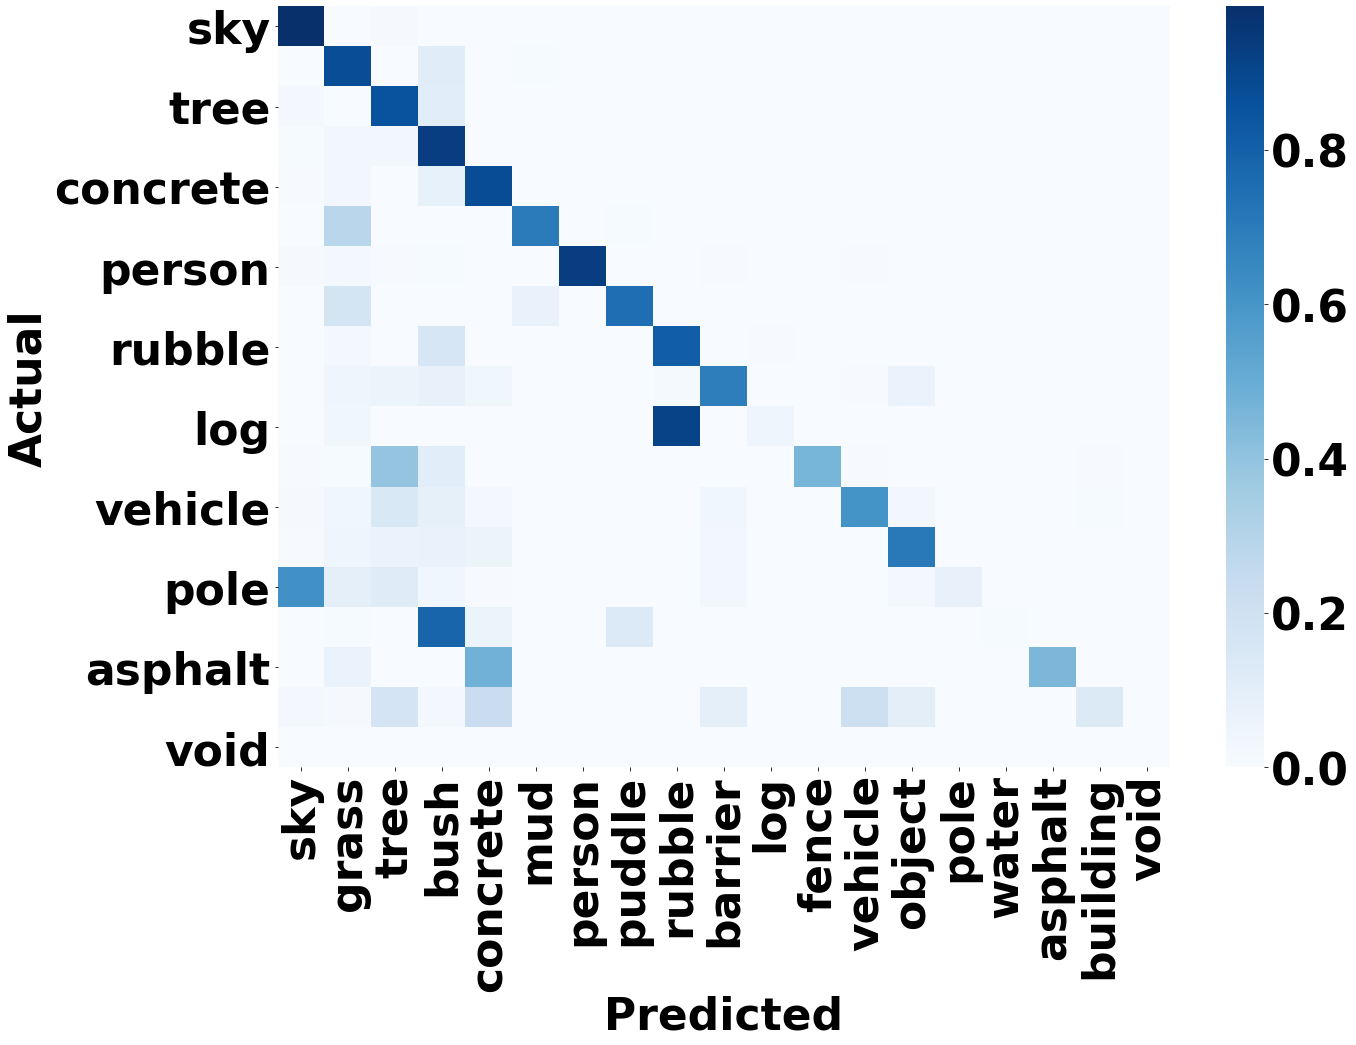

In [82]:
pos = confusion_matrix.sum(1)
res = confusion_matrix.sum(0)
tp = np.diag(confusion_matrix)
IoU_array = (tp / np.maximum(1.0, pos + res - tp))
mean_IoU = IoU_array.mean()    
print(IoU_array,mean_IoU)
for iou in IoU_array:
    iou = iou*100
    print(f" {iou:4.2f} &",end = '')
plot_confusion_matrix(confusion_matrix,classname_list)